# 1. Import and Install Dependencies

In [1]:
pip install tensorflow==2.17.0 opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print(f"Current Python version: {sys.version}")


Current Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [3]:
!pip --version

pip 25.2 from C:\Users\manda\anaconda3\Lib\site-packages\pip (python 3.12)



In [4]:
!pip install mediapipe==0.10.21 --no-cache-dir

   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/51.0 MB 1.0 MB/s eta 0:00:49
    --------------------------------------- 0.8/51.0 MB 1.3 MB/s eta 0:00:39
   - -------------------------------------- 1.3/51.0 MB 1.5 MB/s eta 0:00:34
   - -------------------------------------- 1.8/51.0 MB 1.7 MB/s eta 0:00:30
   - -------------------------------------- 2.1/51.0 MB 1.8 MB/s eta 0:00:28
   -- ------------------------------------- 2.6/51.0 MB 1.7 MB/s eta 0:00:29
   -- ------------------------------------- 3.1/51.0 MB 1.8 MB/s eta 0:00:27
   -- ------------------------------------- 3.4/51.0 MB 1.9 MB/s eta 0:00:26
   --- ------------------------------------ 4.2/51.0 MB 2.0 MB/s eta 0:00:24
   --- ------------------------------------ 5.0/51.0 MB 2.1 MB/s eta 0:00:22
   ---- ------------

In [5]:
!pip install mediapipe==0.10.13


  Using cached mediapipe-0.10.13-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
Using cached mediapipe-0.10.13-cp312-cp312-win_amd64.whl (50.8 MB)
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.21
    Uninstalling mediapipe-0.10.21:
      Successfully uninstalled mediapipe-0.10.21


In [6]:
import mediapipe as mp


In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time


# 2. Keypoints using MP Holistic


In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh  # for face connections


In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:

def draw_landmarks(image, results):
    # Face
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_face_mesh.FACEMESH_TESSELATION,   # or FACEMESH_CONTOURS
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(0,0,255), thickness=1)
        )

    # Pose
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS
        )

    # Left hand
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )

    # Right hand
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )


In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret,frame = cap.read()
        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_landmarks(image, results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [16]:
len(results.pose_landmarks.landmark)

33

In [17]:
len(results.right_hand_landmarks.landmark)

21

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

In [19]:
draw_landmarks(frame, results)

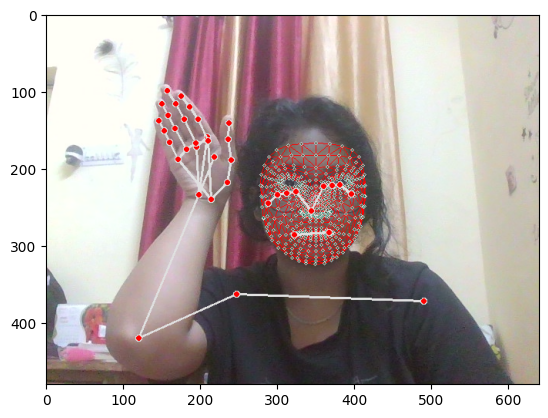

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [21]:
results.pose_landmarks.landmark[0].visibility

0.999946653842926

In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
pose

[array([ 0.53787261,  0.53331536, -0.90407789,  0.99994665]),
 array([ 0.56383425,  0.46569008, -0.84667253,  0.99988675]),
 array([ 0.58102596,  0.46316203, -0.84681016,  0.99983799]),
 array([ 0.59606904,  0.4624171 , -0.84712696,  0.99985796]),
 array([ 0.5074895 ,  0.4793354 , -0.82668507,  0.99988997]),
 array([ 0.48841476,  0.48442671, -0.826482  ,  0.99988067]),
 array([ 0.469915  ,  0.48953024, -0.82686412,  0.99991614]),
 array([ 0.61966807,  0.48682085, -0.43742934,  0.99984777]),
 array([ 0.45089746,  0.51155406, -0.32911301,  0.99992388]),
 array([ 0.57348317,  0.59067923, -0.75311244,  0.99995422]),
 array([ 0.50422847,  0.59620512, -0.72346222,  0.9999522 ]),
 array([ 0.76602089,  0.77693027, -0.19304211,  0.99885052]),
 array([ 0.38638788,  0.7579149 , -0.19500825,  0.99966669]),
 array([ 0.90081155,  1.06594634, -0.13743004,  0.57583338]),
 array([ 0.18867698,  0.8768965 , -0.79071152,  0.99058557]),
 array([ 0.94808972,  1.53604913, -0.25375012,  0.44723505]),
 array([

In [25]:
pose =  np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [26]:
pose

array([ 5.37872612e-01,  5.33315361e-01, -9.04077888e-01,  9.99946654e-01,
        5.63834250e-01,  4.65690076e-01, -8.46672535e-01,  9.99886751e-01,
        5.81025958e-01,  4.63162035e-01, -8.46810162e-01,  9.99837995e-01,
        5.96069038e-01,  4.62417096e-01, -8.47126961e-01,  9.99857962e-01,
        5.07489502e-01,  4.79335397e-01, -8.26685071e-01,  9.99889970e-01,
        4.88414764e-01,  4.84426707e-01, -8.26481998e-01,  9.99880672e-01,
        4.69915003e-01,  4.89530236e-01, -8.26864123e-01,  9.99916136e-01,
        6.19668067e-01,  4.86820847e-01, -4.37429339e-01,  9.99847770e-01,
        4.50897455e-01,  5.11554062e-01, -3.29113007e-01,  9.99923885e-01,
        5.73483169e-01,  5.90679228e-01, -7.53112435e-01,  9.99954224e-01,
        5.04228473e-01,  5.96205115e-01, -7.23462224e-01,  9.99952197e-01,
        7.66020894e-01,  7.76930273e-01, -1.93042114e-01,  9.98850524e-01,
        3.86387885e-01,  7.57914901e-01, -1.95008248e-01,  9.99666691e-01,
        9.00811553e-01,  

In [27]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [29]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [30]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([ 0.53787261,  0.53331536, -0.90407789, ...,  0.22962812,
        0.28777683, -0.03733387])

In [34]:
# Face modle + pose + left hand + right hand 
468*3+33*4+21*3+21*3

1662

# Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [37]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing


In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()